In [51]:
# lets import the necessary libraries and load the dataset.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
concrete_df = pd.read_csv('concrete.csv')

In [53]:
concrete_df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


#### Univariate Analysis

In [54]:
# Let us see the sescription of the attributes indivisually
concrete_df.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


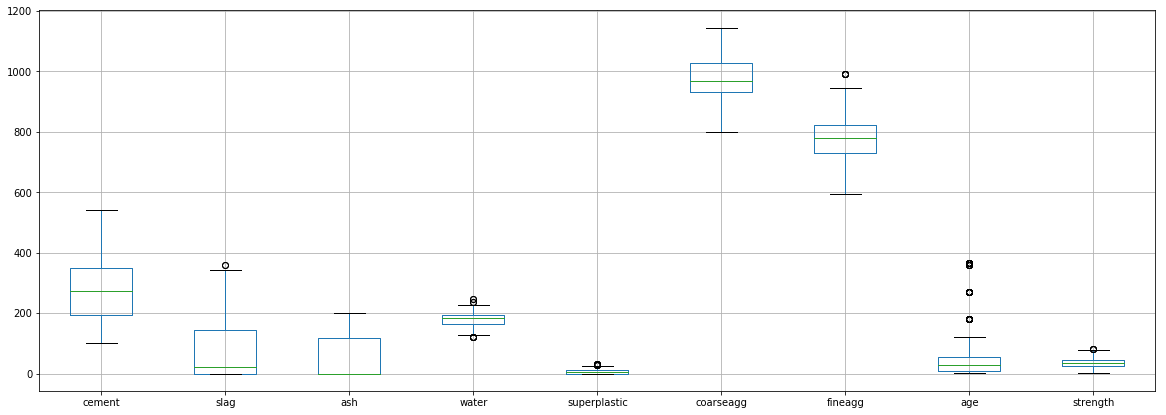

In [55]:
plt.figure(figsize = (20, 7))
concrete_df.boxplot()

In [6]:
# as we can see the attributes slag, water, superplastic, fineagg, age and strength are having outliers 

In [56]:
concrete_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement          1030 non-null float64
slag            1030 non-null float64
ash             1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null int64
strength        1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [57]:
concrete_df.slag.value_counts()

0.0      471
189.0     30
106.3     20
24.0      14
20.0      12
145.0     11
19.0      10
98.1      10
22.0       8
26.0       8
116.0      7
190.0      7
132.4      6
236.0      6
237.5      6
47.5       6
95.0       6
97.1       6
209.4      6
203.5      6
142.5      6
177.0      5
153.0      5
50.1       5
133.0      5
42.2       5
93.4       5
13.6       5
129.9      5
42.1       5
        ... 
116.8      1
139.9      1
17.2       1
169.0      1
17.6       1
163.0      1
237.0      1
114.6      1
105.1      1
190.1      1
91.7       1
169.4      1
259.7      1
243.0      1
139.0      1
164.2      1
167.0      1
100.5      1
117.6      1
238.7      1
178.1      1
148.9      1
98.8       1
163.9      1
128.9      1
161.0      1
160.5      1
129.0      1
100.6      1
209.0      1
Name: slag, Length: 185, dtype: int64

In [9]:
# we have lot of 0.0 values we consider them as missing values and fill these values with central value "Median"
concrete_df = concrete_df.replace(0.0, np.nan)

In [45]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(fill_value='mean')
cols = concrete_df.columns
concrete_df = si.fit_transform(concrete_df)
concrete_df = pd.DataFrame(concrete_df, columns= cols)

In [46]:
concrete_df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.000000,120.288793,203.5,9.816897,971.8,748.5,28.0,29.89
1,168.9,42.200000,124.300000,158.3,10.800000,1080.8,796.2,14.0,23.51
2,250.0,136.158676,95.700000,187.4,5.500000,956.9,861.2,28.0,29.22
3,266.0,114.000000,120.288793,228.0,9.816897,932.0,670.0,28.0,45.85
4,154.8,183.400000,120.288793,193.3,9.100000,1047.4,696.7,28.0,18.29


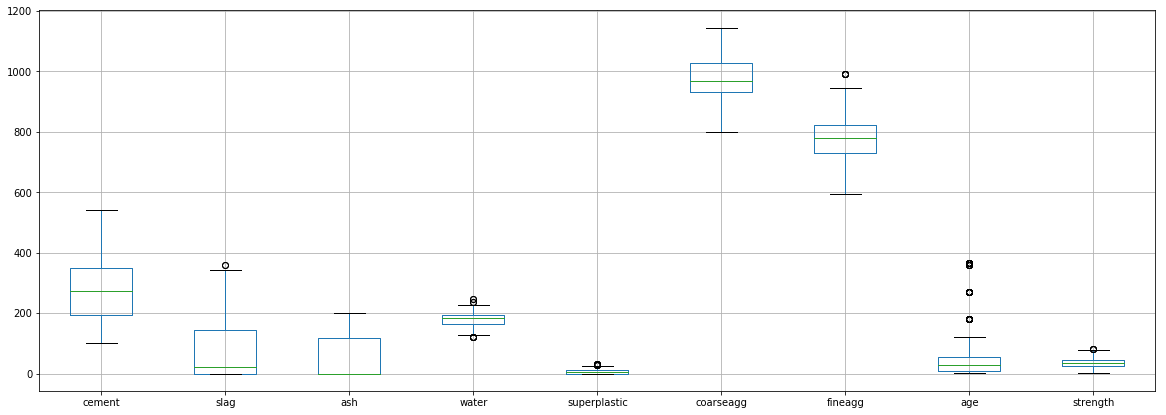

In [58]:
plt.figure(figsize=(20,7))
concrete_df.boxplot()

In [72]:
# we got lot of missing for the attributes slag, ash and superplastic by filling central values 

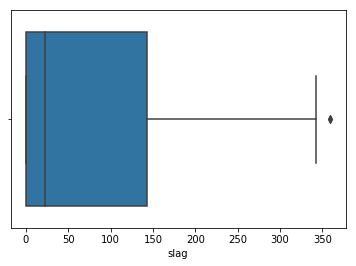

In [59]:
# lets analyze one by one separately
sns.boxplot(concrete_df.slag)

In [ ]:
# so the outliers for slag attributes are below 110 and aboe 160 

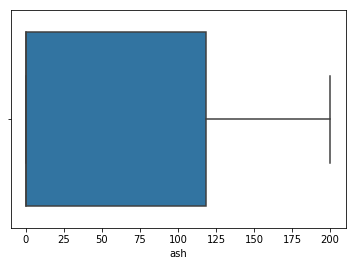

In [60]:
sns.boxplot(concrete_df.ash)

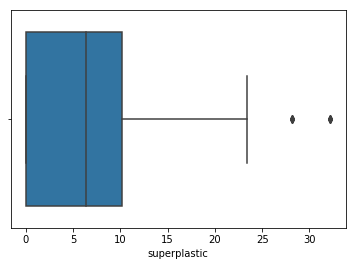

In [61]:
sns.boxplot(concrete_df.superplastic)

In [88]:
# The above 3 attributes are having too many outliers we handle them in different way later.

#### Multivariate analysis

C:\Users\Niket\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


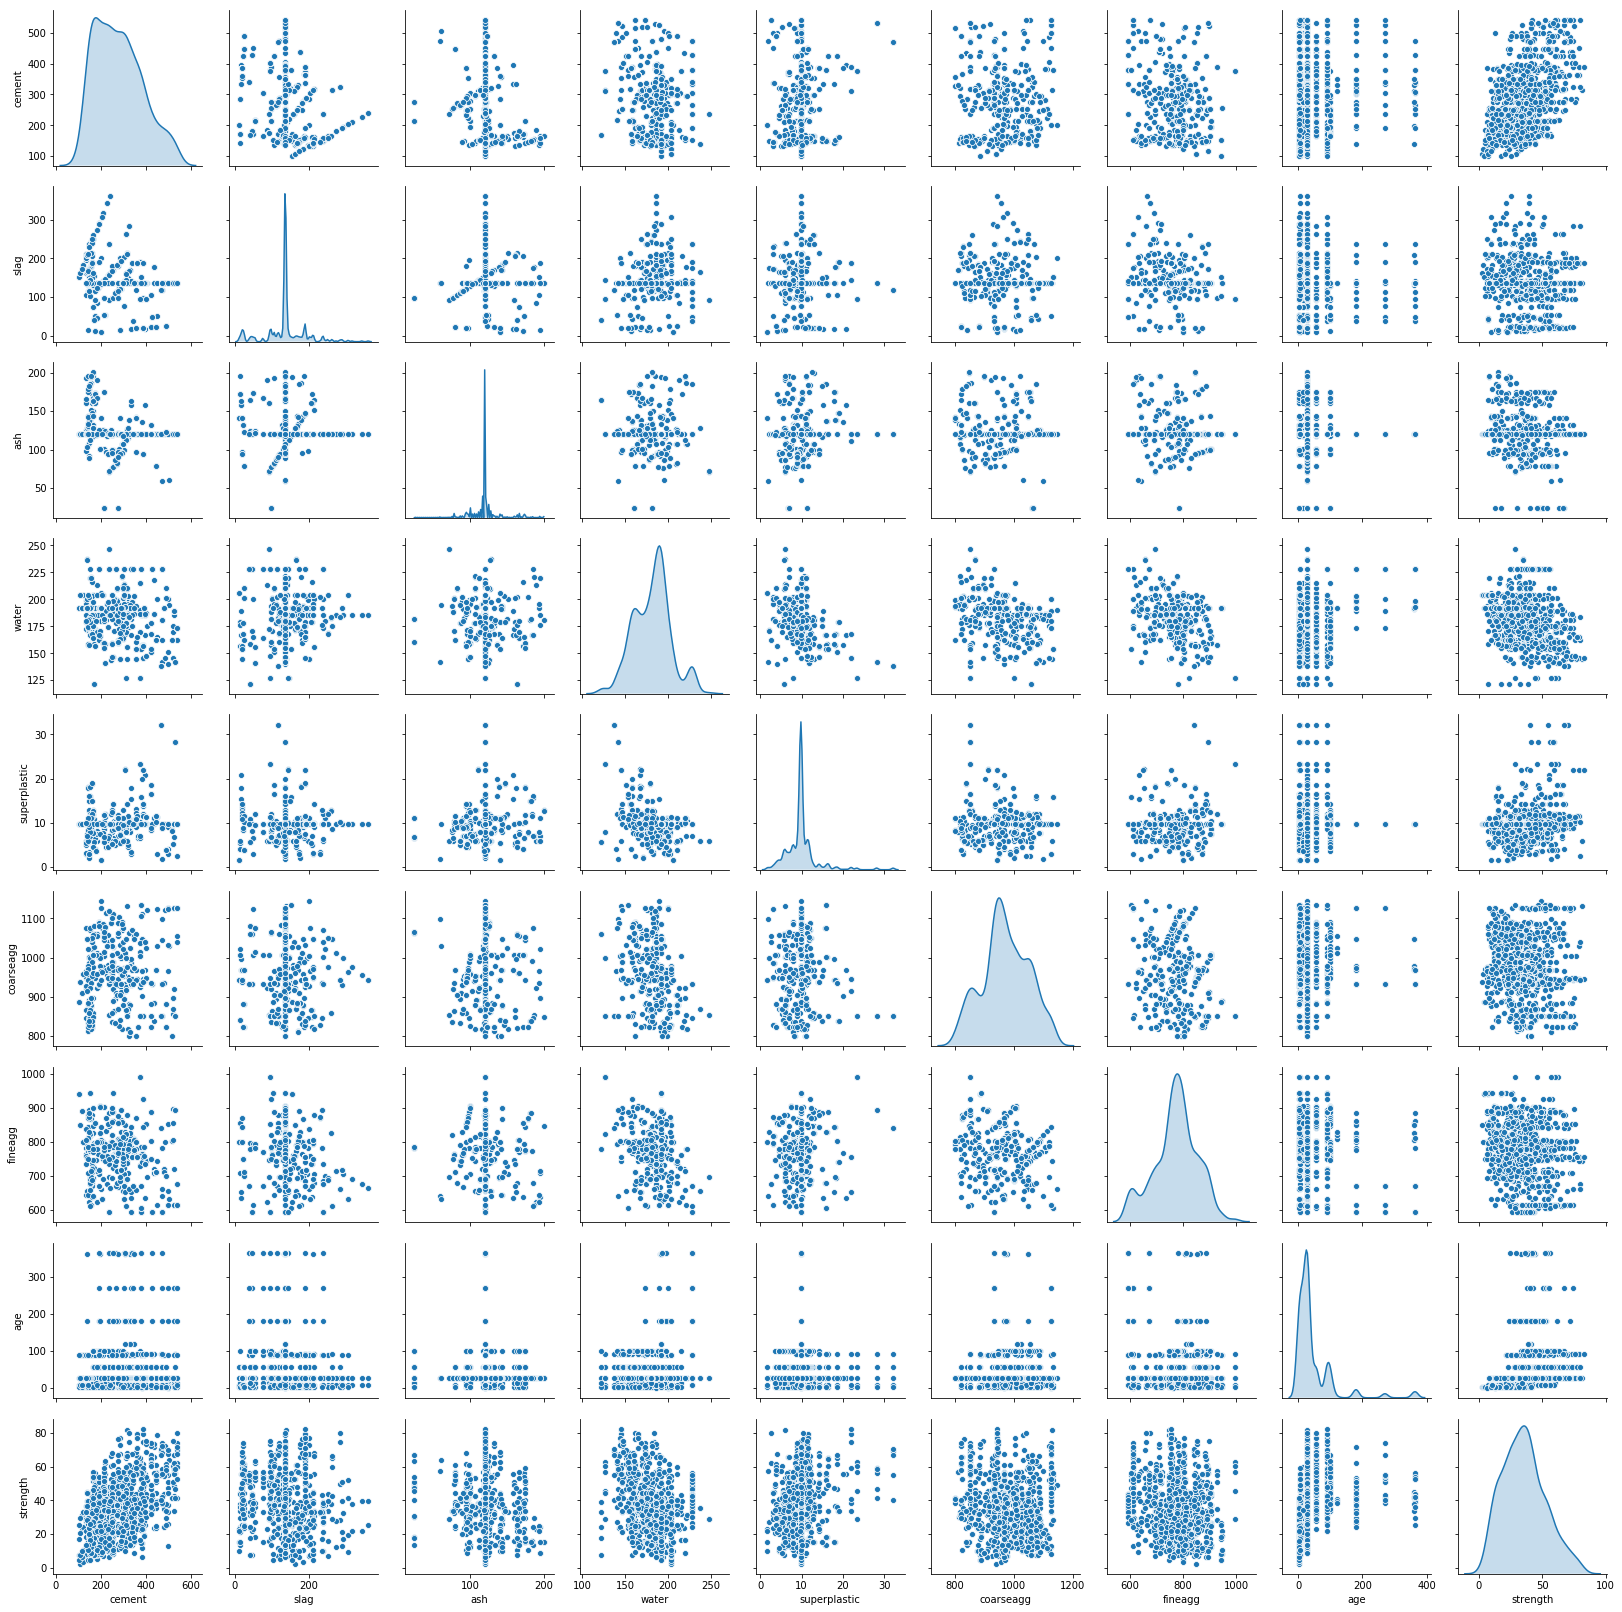

In [13]:
# lets do bi-variate analysize by plotting pair plot
sns.pairplot(concrete_df, diag_kind = 'kde')

In [92]:
# Insights.
# data in many attributes are skewed especially slag, ash and superplastic from above boxplots we 
# have seen these attributes were having 2 many outliers as well.
# data in the age is skewed right but from insights we can also see that age has different clusters as well
# from the pairplot we cannot clearly see the correlation among the attributes
# we plot the correlation heatmap and find some insights about the correlations among the attributes.

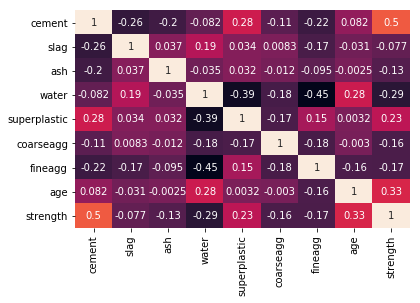

In [14]:
sns.heatmap(concrete_df.corr(), cbar= False, annot= True)

In [96]:
# from above heatmap we can clearly see that attribute cement is correlated with out outcome attribute stregth.
# where rest of them are least correlated.
# we can also see that 4 to 5 cluster can be formed looking at the data.

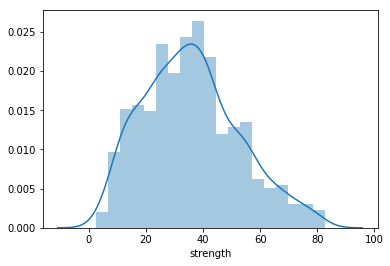

In [16]:
# lets see the distribution of the target attributes.
sns.distplot(concrete_df['strength'])

##### so the target attribure is little right skewed.

In [20]:
concrete_df['age'] = concrete_df['age'].astype('int')

In [62]:
# As the attribute values are not in same scale.
# lets scale the the data.
from scipy.stats import zscore
concrete_df_z = concrete_df.apply(zscore)
concrete_df_z.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,-1.339017,1.601441,-0.847144,1.027590,-1.039143,-0.014398,-0.312970,-0.279733,-0.355018
1,-1.074790,-0.367541,1.096078,-1.090116,0.769617,1.388141,0.282260,-0.501465,-0.737108
2,-0.298384,-0.856888,0.648965,0.273274,-0.118015,-0.206121,1.093371,-0.279733,-0.395144
3,-0.145209,0.465044,-0.847144,2.175461,-1.039143,-0.526517,-1.292542,-0.279733,0.600806
4,-1.209776,1.269798,-0.847144,0.549700,0.484905,0.958372,-0.959363,-0.279733,-1.049727


In [78]:
# As we have seen in the pairplot we have encounter that there can some clusters in the data.
# lets make some clusters and analyze.
#from sklearn.cluster import KMeans
#cluster_errors = []
#clusters = range(2, 20)
#for k in clusters:
#    cluster_model = KMeans(n_clusters=k)
#    cluster_model.fit(concrete_df_z)
#    labels = cluster_model.labels_
#    centroids = cluster_model.cluster_centers_
#    cluster_errors.append(cluster_model.inertia_)

#cluster_df = pd.DataFrame({'num_clusters': clusters, 'cluster_errors': cluster_errors})

# plot the elbow graph
#plt.plot(cluster_df.num_clusters, cluster_df.cluster_errors)

In [30]:
# so we cannot make the clusters for this data. If we make we end up dividing data into lot of clusters.

In [66]:
# we raplace those outliers and check the skewness of the data.
data = concrete_df_z
def replace(data):
    median, std = data.median(), data.std()
    outliers = (data - median).abs() > 2 * std
    data[outliers] = data.median()
    return data

concrete_df_corrected = (data.transform(replace))

In [67]:
concrete_df_corrected.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,-1.339017,-0.601778,-0.847144,1.027590,-1.039143,-0.014398,-0.312970,-0.279733,-0.355018
1,-1.074790,-0.367541,1.096078,-1.090116,0.769617,1.388141,0.282260,-0.501465,-0.737108
2,-0.298384,-0.856888,0.648965,0.273274,-0.118015,-0.206121,1.093371,-0.279733,-0.395144
3,-0.145209,0.465044,-0.847144,0.160829,-1.039143,-0.526517,-1.292542,-0.279733,0.600806
4,-1.209776,1.269798,-0.847144,0.549700,0.484905,0.958372,-0.959363,-0.279733,-1.049727


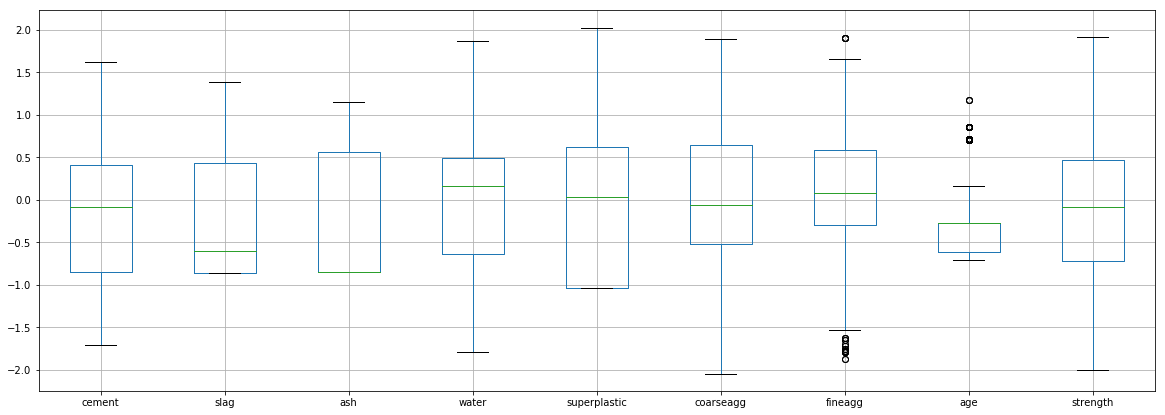

In [77]:
plt.figure(figsize=(20,7))
concrete_df_corrected.boxplot()